# From Wiebke DPP where it did not fit in

In [ ]:
# Standardize at the end to allow interpretability 
# update dataframe
#we still have the df "varnum" saved from the analysis

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

varnum = credit.select_dtypes(include='float64')
varnumstand = pd.DataFrame(sc_X.fit_transform(varnum), columns=varnum.columns)
creditnew = credit.drop(columns=credit.select_dtypes(include='float64').columns)
creditnew = pd.concat([creditnew, varnumstand], axis=1, join='inner')
creditnew.head()


# Python primer #2: supervised machine learning revisited

Welcome to our second ADAMS exercise. Today, we revisit some standard practices in supervised machine learning.
Similar content was part of the lecture [Business Analytics and Data Science](https://moodle.hu-berlin.de/course/view.php?id=90853)
, which many of you will have attended. Let us see how Python supports supervised ML. 

Here is the outline of today. 

1. Scikit-learn and classification
2. Cross-entropy and Loss function

**Scikit-learn** will be the "go-to" library when it comes to machine learning. Make sure to have it installed if you 
use your own computer. Of course, it is part of the Anaconda distribution. Since the functionality of scikit-learn is 
massive, it is good practice to not import the whole library but the parts that you need. We illustrate this approach 
below.  

In [2]:
# scikit-learn (sklearn) is *the* standard package for machine learning in python. Commonly needed functions include:

# Data split function
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Model tuning functions
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Model training functions
from sklearn.ensemble import RandomForestClassifier

# Libraries to calculate various metrics
from sklearn import metrics

## Basic modelling (random forest)
We will first load some standard Python libraries for data handling, most importantly Pandas, 
load a [Kaggle data set](https://www.kaggle.com/mhdzahier/travel-insurance?#travel%20insurance.csv)
related to insurance claims, and then apply some standard Pandas functions to the resulting data frame
for getting an overview of the data. 

In [3]:
# Importing libraries 
import pandas as pd
import numpy as np
import os

# This is were I store the data on my computer. You will have to change this.
file_name: str = '../../data/travel insurance.csv'

if os.path.exists(file_name):
    data = pd.read_csv(file_name)
else:
    url: str = 'https://github.com/Kaggle/kaggle-api'
    print('File {} not found. Check where on your hard disk you stored the data.'.format(file_name))
    print('Even better, check out {} for examples how to load data directly from kaggle.'.format(url))
   

In [4]:
data.head(n=4)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32


In [5]:
data.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [6]:
data.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

When dropping columns by name, don't forget to specify the axis. Drop defaults to axis=0, which is row-wise.

In [7]:
data=data.drop(['Destination'], axis=1)

In [8]:
data.index

RangeIndex(start=0, stop=63326, step=1)

Pandas offers many convenience functions to solve common data science tasks.
For example, drop rows (or columns) that contain missing values.

In [9]:
data=data.dropna(how='any')

In [10]:
data.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Net Sales', 'Commision (in value)', 'Gender',
       'Age'],
      dtype='object')

In [11]:
X=data.drop(['Claim'], axis=1)
y=data.Claim # or data["Claim"]

In [12]:
y=y.map({'Yes': 1, 'No': 0})
y.mean()

0.03507327515231352

Sklearn's Random Forest can not process categorical data, unlike its R counterpart. 
Hence, we will need to use __one-hot encoding__ . We can use Pandas or Sklearn for that:

In [13]:
X= pd.get_dummies(X, prefix_sep="_",columns=X.select_dtypes(include=[object]).columns)
X.head(10)

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Gender_F,Gender_M
0,186,-29.00,9.57,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,186,-29.00,9.57,71,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,66,-121.00,42.35,44,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
11,1,-18.00,6.30,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,53,-130.00,49.40,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,3,-18.00,6.30,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21,12,46.15,11.54,44,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22,7,17.55,4.39,25,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,12,94.00,23.50,34,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,190,294.75,73.69,26,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Now that we have our data in place, let' create a random forest classifier to predict y from X.
Similar to R's {mlr}, we first create a model as an object and set its parameters and options. 
Think of this as a concrete specification of the abstract algorithm Random Forest. 
We then fit the model to the actual data using a method of the object.

In [14]:
# Train/Fit a model
fullmodel = RandomForestClassifier(n_estimators=10, # Forest with n trees
                                   max_depth=15) # and very shallow
fullmodel.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
# Make predictions
y_pred = fullmodel.predict(X)
print(y_pred[0:4])

[0 0 0 0]


In [16]:
# Probabilities are returned for each class, unfortunately without the class names
y_pred_prob = fullmodel.predict_proba(X)
print('Original output of predict_proba function...')
print(y_pred_prob[0:5])
print('... and what you typically need:')
y_pred_prob = y_pred_prob[:,1]
print(y_pred_prob[0:5])

Original output of predict_proba function...
[[1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [9.99104533e-01 8.95467482e-04]
 [1.00000000e+00 0.00000000e+00]]
... and what you typically need:
[0.         0.         0.         0.00089547 0.        ]


In [17]:
# Calculate performance measures
cnf_matrix = metrics.confusion_matrix(y, y_pred)
print("Confusion Matrix: \n", cnf_matrix)

print('Classification Accuracy: ',   metrics.accuracy_score(y, y_pred))
print('Classification Error: \t',    1 - metrics.accuracy_score(y, y_pred))
print("Recall:  \t\t",               metrics.recall_score(y, y_pred))
print("Precision: \t\t",             metrics.precision_score(y, y_pred))
print("F1 score: \t\t",              metrics.f1_score(y, y_pred))
print('AUC: \t\t\t',                 metrics.roc_auc_score(y, y_pred_prob))

Confusion Matrix: 
 [[17580     0]
 [  489   150]]
Classification Accuracy:  0.9731598880289807
Classification Error: 	 0.02684011197101932
Recall:  		 0.2347417840375587
Precision: 		 1.0
F1 score: 		 0.38022813688212925
AUC: 			 0.9889802218697088


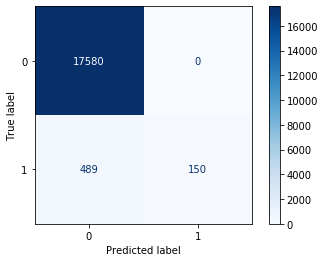

In [18]:
# Proper way to depict a confusion matrix
metrics.plot_confusion_matrix(fullmodel,X,y,
                              cmap='Blues',
                              values_format='n');

Split data into a training and test set. Note that four objects are assigned simultanesouly.

In [19]:
# random state is similair to setting the seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)

In [20]:
rf = RandomForestClassifier(n_estimators=10,max_depth=15)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_matrix = metrics.confusion_matrix(y_test, rf_pred)
rf_pred_prob = rf.predict_proba(X_test)
print(y_pred_prob[0:3])
rf_pred_prob = rf_pred_prob[:,1]
print("Confusion Matrix: \n", rf_matrix)

[0. 0. 0.]
Confusion Matrix: 
 [[7040   19]
 [ 228    1]]


In [21]:
print('Classification Accuracy: ',   metrics.accuracy_score(y_test, rf_pred))
print('Classification Error: \t',    1 - metrics.accuracy_score(y_test, rf_pred))
print("Recall:  \t\t",               metrics.recall_score(y_test, rf_pred))
print("Precision: \t\t",             metrics.precision_score(y_test, rf_pred))
print("F1 score: \t\t",              metrics.f1_score(y_test, rf_pred))
print('AUC: \t\t\t',                 metrics.roc_auc_score(y_test, rf_pred_prob))

Classification Accuracy:  0.9661086717892426
Classification Error: 	 0.033891328210757354
Recall:  		 0.004366812227074236
Precision: 		 0.05
F1 score: 		 0.008032128514056226
AUC: 			 0.7125021110280103


Visualize ROC curve using matplotlib

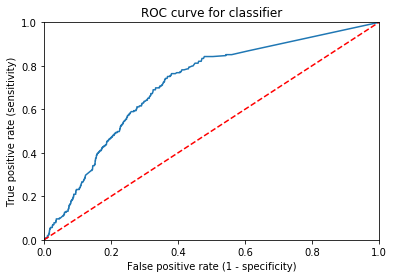

In [22]:
import matplotlib.pyplot as plt
# ROC curve, needs y_pred_prob, returns three objects in this order
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False positive rate (1 - specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.plot([0, 1], [0, 1], "r--") # horizontal line to represent random classifier
plt.show()

## Model tuning 

In [23]:
# Selection of parameters with (few and randomly picked!) example values:
# n_estimators : integer (default=10 --> The number of trees in the forest.
# max_features : int, float, string or None (default=”auto”) The number of features to consider when looking for the best split
# criterion : string (default=”gini”), or entropy
# max_depth : integer or None (default=None) The maximum depth of the tree.
# min_samples_split : int, float (default=2) --> The minimum number of samples required to split an internal node.
# min_samples_leaf : int, float (default=1) --> The minimum number of samples required to be at a leaf node.
param_grid = {'n_estimators': [10, 20, 30], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'], # More detailed than caret
              'max_depth': [5, 10], 
              'min_samples_split': [4],
              'min_samples_leaf': [10]
             }

# Set up the grid object specifying the tuning options (grid search + cross validation)
grid = GridSearchCV(rf, param_grid, cv = 3, scoring = 'roc_auc')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

# Set the clf to the best combination of parameters
myBestModel = grid.best_estimator_

0.7764196606276293
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 20}


In [24]:
# Fit a model using the best hyperparameter settings using the whole training data set, and assess this model on the test set. 
myBestModel.fit(X_train, y_train)
y_pred_best = myBestModel.predict(X_test)
y_pred_best_prob = myBestModel.predict_proba(X_test)[:,1]
print('AUC of best model: ', metrics.roc_auc_score(y_test, y_pred_best_prob))
print("\n")

AUC of best model:  0.7807175453801427




This seems to be a [nice tutorial on how to tune keras models using sklearn](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/).

## Logistic regression (reminder)

When running a classification task, we are looking for a probability of a certain outcome. Here is the sigmoid function where *p* stands for target probability:
$$p=\frac{1}{1+e^{-y}}$$

Logistic regression formula would then be:

$$y=ln(\frac{p}{1-p})=\beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+...+\beta_{k}X_{k}$$

Let's present the formula in a slightly more general way:

$$y=WX+b$$

where the W stands for the **weight** matrix, containing coefficients/betas for respective explanatory 
variables, and b is an error term or a **bias**.


In [25]:
# Logistic regression classifier via scikit-learn. 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(solver='lbfgs', max_iter=100)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
y_pred_prob = LogReg.predict_log_proba(X_test)

#### add explanation of logit functionning, let's try to do it manually. how do you optimise and how do you choose a measure?

C:\ProgramData\Anaconda3\envs\adams\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Logistic regression for multiclass task
To illustrate an application of logit to a classification task with more than two classes, we need a new data set.
*The Mobile App Store* data set will serve the purpose. Details of that data set are available on its 
[kaggle homepage](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps). 

In [26]:
#import pandas as pd
#import numpy as np
app = pd.read_csv("../../data/AppleStore.csv")
app=app.drop(['Unnamed: 0'],axis=1)
app.head(10)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [56]:
print(app["user_rating"])


0       4.0
1       4.0
2       3.5
3       4.0
4       4.5
       ... 
7192    4.5
7193    4.5
7194    4.5
7195    4.5
7196    5.0
Name: user_rating, Length: 7197, dtype: float64


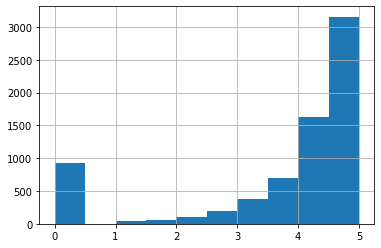

In [58]:
app.user_rating.hist();

Let's consider a multi-class problem, we want to figure out which user rating will the app receive.
Options are [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5] - there are __11__ possible labels

We have the $$y=WX+b$$
The resulting *y* is a logit or a score:

$$\hat{y}=score(X_{i},k)=\beta_{k}X_{i}$$

where $i$ is the number of observation and $k$ is the rank level ("1", "4.5", etc.)

The scores then would have to be transformed to the probability. For multi-class tasks, the standard tool to
perform this transformation is called **softmax**.

Softmax function:

$$S(y_{i})=\frac{e^{y_{i}}}{\sum_{j} e^{y_{i}}}$$

When we develop a classification model, we aim to map the model's inputs to probabilistic predictions, 
and we often train our model by incrementally adjusting the model's parameters so that our
 predictions get closer and closer to ground-truth probabilities.
 
Assume you have obtained a set of scores from your model $$\hat{y}=score(X_{i},k)=\beta_{k}X_{i}$$. 
Let's put the scores through the softmax function and see what happends.

In [61]:
# Our scores for each of the different classes
scores = [-100, -10, -0.5, -0.1, 0, 0.21, 1, 1.8, 5, 100]

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)
print(softmax(scores))

[1.38389653e-87 1.68891188e-48 2.25634014e-44 3.36606394e-44
 3.72007598e-44 4.58937611e-44 1.01122149e-43 2.25051482e-43
 5.52108228e-42 1.00000000e+00]


In [29]:
#our observation can only be labelled as one class, so the probabilities should sum up to 1, check it out:
sum(softmax(scores))

1.0

Now, if we are trying to classify the input as "5", "1,5"... rank labels and we feed our model information 
about an app with user rating of  **3.5**, we would like to see our probabilities looking more
like [0.08 0.1 0.02 0.1 0.06 0.08 0.001 0.81 0.004 0.03 0.0002 ]. This would mean that the model is getting a grasp of the data. 

[0.2135499  0.17483987 0.07935017 0.38911329 0.14314678 0.2135499  0.17483987 0.07935017 0.38911329 0.14314678 0.1231] means that our model is somewhat on the way but still a little uncertain, we need to give her a nudge in the right direction. So how do you usually tell the model it's wrong? You show it the evaluation metric and try to make it better.

To evaluate the the probabilities estimated by the model, we need to compare them with the true values, 
that are one-hot encoded in our case. So we need to compare

[0.2135499  0.17483987 0.07935017 0.38911329 0.14314678 0.2135499  0.17483987 0.07935017 0.38911329 0.14314678 0.1231]
and [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]. 
You can imagine that we can not use MSE here, as we are dealing with a certain probability distribution.
Our loss function has to grasp the difference between these probabilities. This is where the cross-entropy loss
function will come in handy. It is used when the output of a model represents the probability of an outcome, i.e. when the output is a probability distribution. 
It is used as a loss function in neural networks that have softmax activations in the output layer.

*Remark*: in case you are interested, there a nice article (with codes) on the differences between squared-error and cross-entropy
in the context of training neural networks appeared in the [Visual Study magazine](https://visualstudiomagazine.com/articles/2017/07/01/cross-entropy.aspx).

## Loss functions
### Logistic regression case
$$J(w) = \sum_{i=1}^{m} y^{(i)} \log P(y=1) + (1 - y^{(i)}) \log P(y=0)$$
Where $P(y)$ represent the probability of a certain binary outcome.


### Cross-entropy 
Entropy (H(y)) is a term from Information Theory. It had a great impact on the field of communication and 
signifies the optimal number of bits to encode a certain information content ($y_i$ is the probability of
the i-th event, symbol or in our case class):

$$H(y) = \sum_i y_i \log \frac{1}{y_i} = -\sum_i y_i \log y_i$$

The cross-entropy $H \left ( y,\hat{y} \right)$ (H(y,y^)) is the number of bits we'll need if we encode symbols from 
$y$ using the wrong tool $\hat{y}$. Cross entropy is always bigger or equal to entropy.
Mind that $i$ stands for the number of classes. 

$$H(y, \hat{y}) = \sum_i y_i \log \frac{1}{\hat{y}_i} = -\sum_i y_i \log \hat{y}_i$$

Interestingly enough, the The KL divergence that you have encountered before in BADS (uplift random forest) is simply the difference between cross entropy and entropy:
$$\mbox{KL}(y~||~\hat{y})
= \sum_i y_i \log \frac{1}{\hat{y}_i} - \sum_i y_i \log \frac{1}{y_i}
= \sum_i y_i \log \frac{y_i}{\hat{y}_i}$$

We would be calculating the cross-entropy for every vector of true/estimated probabilities and averaging
it over the sample or batch (more about it later) - this will be our loss function *L* that we will
ultimately want to minimise (class i, sample j):

$$L=-\frac{1}{N}\sum_j \sum_i y_{j,i} \log(\hat{y}_{j,i})$$


#### CE example
A concrete example is the best way to explain the purely mathematical form of CE. Suppose you have a weirdly shaped
four-sided dice (yes, I know the singular is really "die"). Using some sort of intuition or physics, you predict
that the probabilities of the four sides are (0.20, 0.40, 0.30, 0.10). 
You then roll the dice many thousands of times and determine that the true probabilities are  (0.15, 0.35, 0.25, 0.25). 
Here is how we calculate the CE error of our prediction:

CE prediction error:
-1.0 * [ ln(0.20) * 0.15 + ln(0.40) * 0.35 + ln(0.30) * 0.25 + ln(0.10) * 0.25 ] = 
-1.0 * [ (-1.61)(0.15) + (-0.92)(0.35) + (-1.20)(0.25) + (-2.30)(0.25) ] =
1.44

In [66]:
import numpy as np
ce=-1.0 * (np.log(0.20) * 0.15 + np.log(0.40) * 0.35 + np.log(0.30) * 0.25 + np.log(0.10) * 0.25)
print('Cross entropy error of weird dice prediction is: {:.4f}'.format(ce))

Cross entropy error of weird dice prediction is: 1.4388


Let us revisit the above example of user ratings of apps. There, we had 11 classes. Hence, $i$ equals 11. 
Below, we consider an app with true user rating of 3.5 (check the one-hot encoded vector) and assume some output
by our classification model. We first translate the output into probabilistic predictions using softmax, and
then compute the cross-entropy loss corresponding to that probabilistic prediction.

In [67]:
# True rating of 3.5 one-hot encoded 
true =   [0 ,0    ,    0,0 ,    0, 0,   0, 1, 0, 0,  0]
# Output of the classification models (i.e., scores resulting from WX+b)
scores = [-1, -0.5, -0.1, 0, 0.21, 1, 1.8, 4, 0, 1,0.1]
# Predicted probabilities
yhat=softmax(scores) 
# CE loss
L=-sum(true*np.log(yhat))
print(L)

0.28085812099954477


In order to minimise the loss, we would need a derivative.
NB: Our i an j would potentially go into thousands, calculating the derivative of the loss function will become extremely hard. And that was the point when everybody almost gave up on neural networks. We will learn about the solution  - backpropagation and stochastic gradient descent at the next tutorial. 

NB: Keep in mind, that depending on the task, just like in previous machine learning cases, you can choose a specific loss function that fits your goals.

## Gradient (reminder)
The gradient is a vector operation, which operates on a scalar function to produce a vector whose magnitude is the maximum rate of change of the function at the point of the gradient and which is pointed in the direction of that maximum rate of change. 
 $$\nabla L$$
 
 <img src="gradient_descent.png" alt="lossstruct" style="width: 600px;"/>

## Gradient descent
We want to adjust every estimation of y so as to minimize the loss function. For that we would deduct a gradient of the loss function from it and continue doing these iterations until we reach the local minimum. 
$$L_{t+1} =L_t - \eta . \nabla L(W_{ij})$$
$\eta$ stands here for a *learning rate* - a very important concept to keep in mind.
As we will learn later, we will need a chain rule in order to calculate the gradient for the neural network case. 
At the moment we can see how the gradient descent works on a simple function.

In [68]:
#We will try to find the local minimum of (x-4)^2 function. In this case gradient is a simple derivative

cur_x = 10 
rate = 0.1 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 20 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x-4) #Gradient of our function '

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)

#https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1

Iteration 1 
X value is 8.8
Iteration 2 
X value is 7.840000000000001
Iteration 3 
X value is 7.072000000000001
Iteration 4 
X value is 6.457600000000001
Iteration 5 
X value is 5.966080000000001
Iteration 6 
X value is 5.572864000000001
Iteration 7 
X value is 5.2582912
Iteration 8 
X value is 5.00663296
Iteration 9 
X value is 4.805306368
Iteration 10 
X value is 4.6442450944
Iteration 11 
X value is 4.51539607552
Iteration 12 
X value is 4.412316860416
Iteration 13 
X value is 4.3298534883328
Iteration 14 
X value is 4.26388279066624
Iteration 15 
X value is 4.211106232532992
Iteration 16 
X value is 4.168884986026393
Iteration 17 
X value is 4.135107988821114
Iteration 18 
X value is 4.108086391056892
Iteration 19 
X value is 4.0864691128455135
Iteration 20 
X value is 4.0691752902764105
The local minimum occurs at 4.0691752902764105


Keep this theory in mind - we will map all those concepts on the neural network design to make better sense of them.